In [157]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [158]:
# 1 a) Reading the data
data = pd.read_csv('vehicle.csv')

In [159]:
# 1 b) Shape of data
data.shape

(846, 19)

In [160]:
# 1 c) Datatypes
data.dtypes
# All independent attributes have float or integer data types
# Target variable is object type

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [161]:
# 1 d) Head
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [162]:
# 1 e) Descriptive Statistics
data.describe().T
# Target variable is object type and hence will not have descriptive statistics
# Missing values can be found by seeing count columns in the below chart
# Mean & Median are close for most of the parameters barring scatter_ratio, scaled_variance, scaled_variance.1
# Data looks legit as all stats seems reasonable
# For variables such as compactness, circularity, radius_ratio, pr.axis_aspect_ratio, pr.axis_rectangularity, max.length_aspect_ratio
# scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.2, mean & median are close and hence
# they are close to normal distribution
# For variables such as distance_circularity, scatter_ratio, max.length_rectangularity,scaled_variance,scaled_variance.1,
# skewness_about.1, mean is greater than median. hence, they are left skewed
# For variables such as elongatedness & hollows_ratio, mean is lesser than median.Hence, they are right skewed

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [163]:
# 1f) Checking missing values
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [164]:
# 1 f) Replace missing values with median data as there are few outliers for scaled_variance.1
num_cols = data.drop('class', axis =1)
class_name = pd.DataFrame(data[['class']])
num_cols = num_cols.apply(lambda x:x.fillna(x.median()), axis =0)
data = num_cols.join(class_name)
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [165]:
# 1 g) Checking '?' values
for value in ['compactness','circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio',
               'scatter_ratio','elongatedness','pr.axis_rectangularity','max.length_rectangularity','scaled_variance','scaled_variance.1',
             'scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio',
             'class']:
    print (value,":",sum(data[value]=='?'))
# No ? in values

compactness : 0
circularity : 0
distance_circularity : 0
radius_ratio : 0
pr.axis_aspect_ratio : 0
max.length_aspect_ratio : 0
scatter_ratio : 0
elongatedness : 0
pr.axis_rectangularity : 0
max.length_rectangularity : 0
scaled_variance : 0
scaled_variance.1 : 0
scaled_radius_of_gyration : 0
scaled_radius_of_gyration.1 : 0
skewness_about : 0
skewness_about.1 : 0
skewness_about.2 : 0
hollows_ratio : 0
class : 0


C:\Users\amikar.jha\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [166]:
# 1 h) Check for duplicate data

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups]

# No duplicates

Number of duplicate rows = 0


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015200129198>,
      dtype=object)

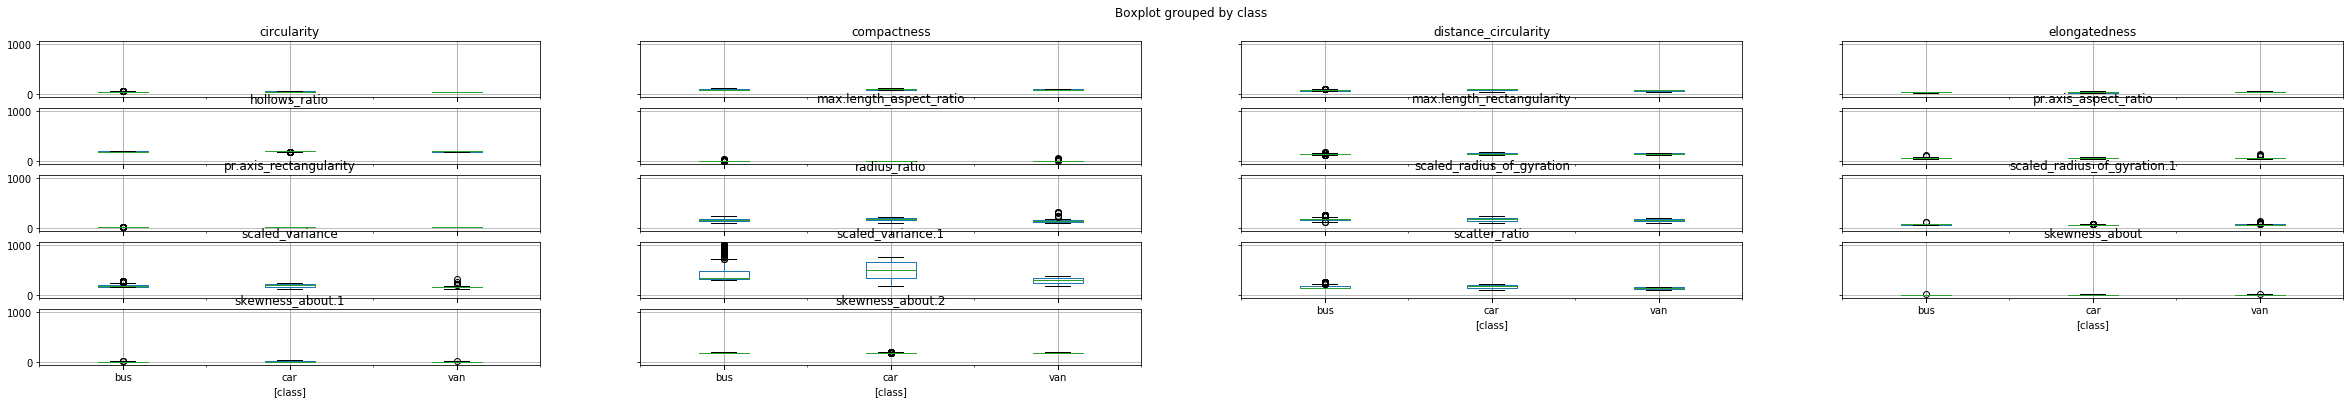

In [167]:
# 1 i) Checking outliers
data.boxplot(by = 'class', figsize = (40,6))
# There are many outliers on each dimension  (indicated by the black circles)
# If the outliers are addressed, the clusters will overlap much less than right now

In [94]:
# 1 i) Replacing outliers with median value      
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('class').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(data['class']))

C:\Users\amikar.jha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\amikar.jha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\amikar.jha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\amikar.jha\AppData\Local\Continuum\anaco

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015202B37BE0>,
      dtype=object)

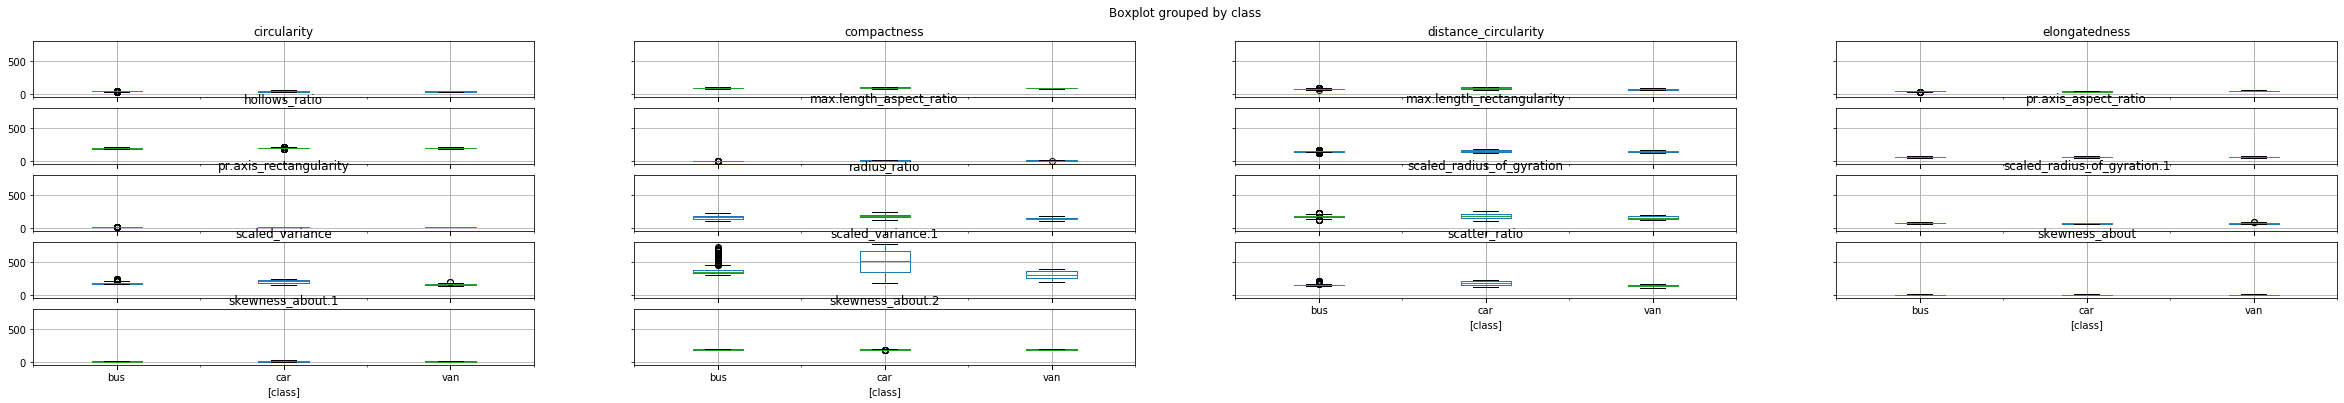

In [168]:
# 1 i) Checking outliers post replacement with median value
concat_data.boxplot(by = 'class', figsize=(40, 6))
# Note: When we remove outliers and replace with median, the distribution shape changes, the standard deviation becomes
# tighter creating new outliers. The new outliers would be much closer to the center than original outliers so we accept them
# without modifying them

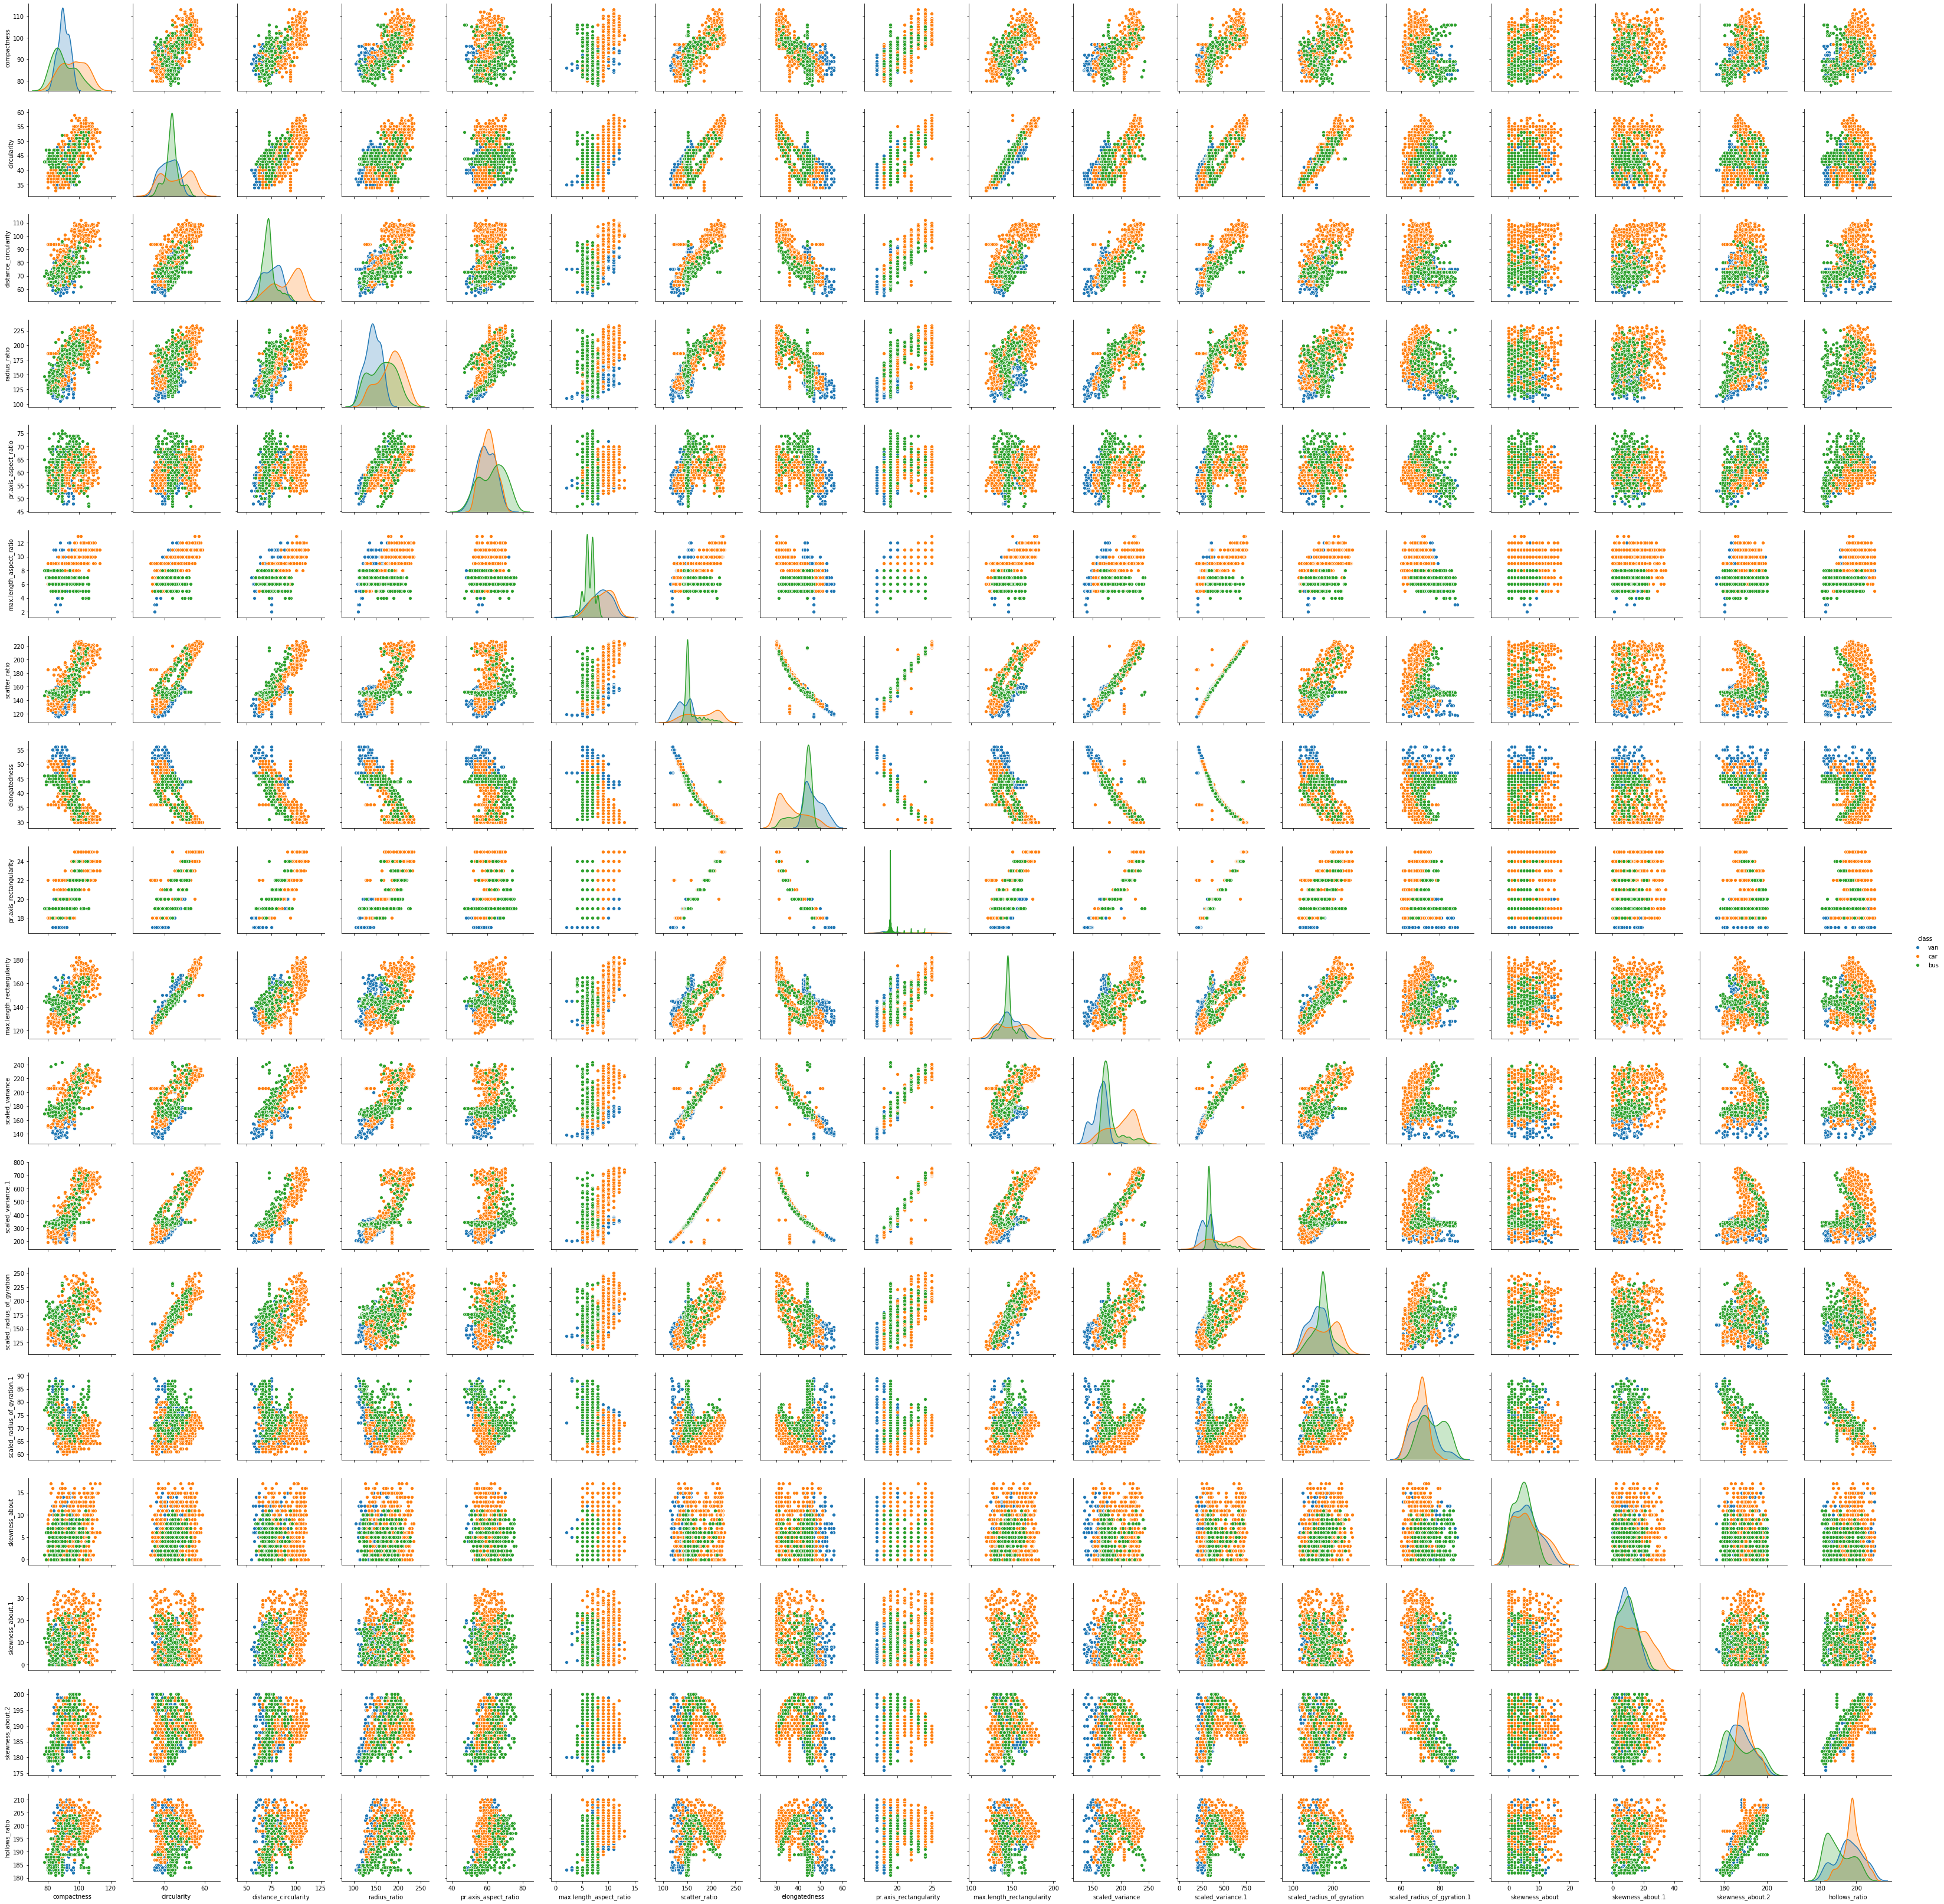

In [169]:
# 2 a) Checking relationship b/w different attributes
sns.pairplot(concat_data, hue ='class', diag_kind = 'kde')

In [170]:
# When we see diagonals, we see that even within clusters of van, bus & car, there are more clusters within them
# For ex. check compactness diagonal: All 3 car, bus & van seems to have another hidden gaussian which is clear from the peaks
# There could be 36 clusters at max for the given dataset
# Let us discuss off-diagonals in the below section; 
# Compactness is one of the key compponent for identification of van, car & bus
# Ideally, independent variable should not influence each other
# In case, independent variables have strong correlation, one variable becomes redundant and we can choose 1 variable

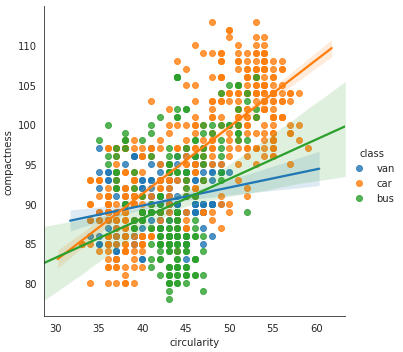

In [171]:
# Let us analyze the compactness column vs other column group wise
# compactness vs circularity
var ='circularity'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')

# Compactness is correlated with circularity strongly for car, less for both bus and van 

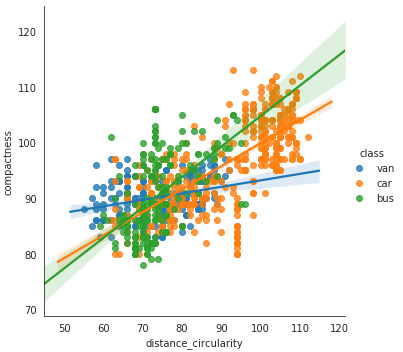

In [172]:
# Let us analyze the compactness column vs other column group wise
# compactness vs distance_circularity
var ='distance_circularity'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')

# Similarly, distance_circularity is correlated strongly for bus, less with car and least with van

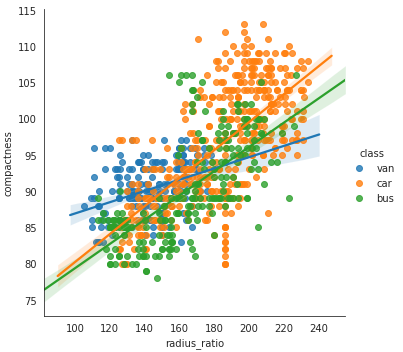

In [173]:
# Let us analyze the compactness column vs other column group wise
# compactness vs radius_ratio
var ='radius_ratio'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')

# Similarly, radius_ratio is correlated strongly for car, bus and van

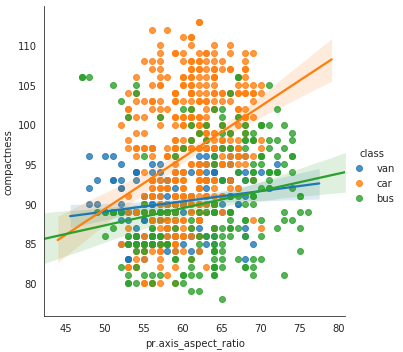

In [174]:
# Let us analyze the compactness column vs other column group wise
# compactness vs pr.axis_aspect_ratio
var ='pr.axis_aspect_ratio'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')

# pr.axis aspect ratio is correlated strongly for car only; Less or nil correlation for both van and bus

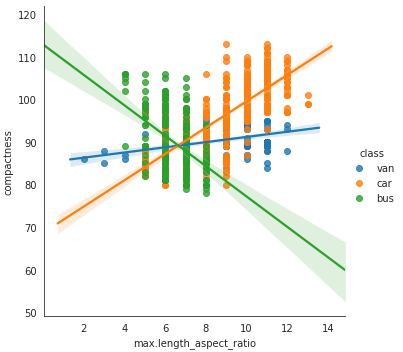

In [175]:
# Let us analyze the compactness column vs other column group wise
# compactness vs max.length_aspect_ratio
var ='max.length_aspect_ratio'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')
    
# Max.length aspect ratio is correlated strongly positively for car & strongly negatively for bus; Nil correlation with van

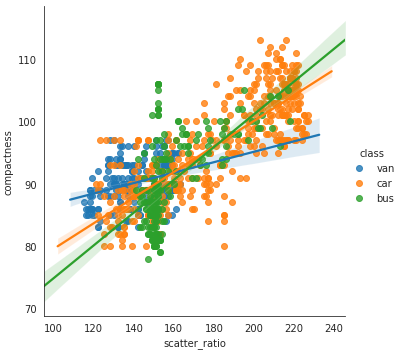

In [176]:
# Let us analyze the compactness column vs other column group wise
# compactness vs scatter_ratio
var ='scatter_ratio'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')
# Scatter ratio is correlated strongly positively for bus & car; Less correlation for van

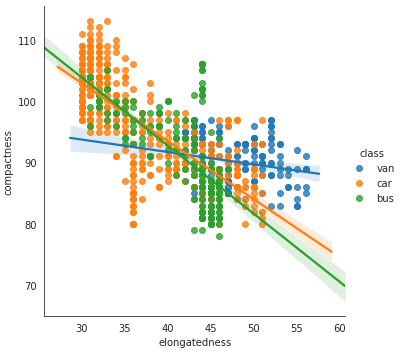

In [177]:
# Let us analyze the compactness column vs other column group wise
# compactness vs elongatedness
var ='elongatedness'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')
    
# Elongatedness is correlated strongly negatively for bus & car; Less negative correlation for van

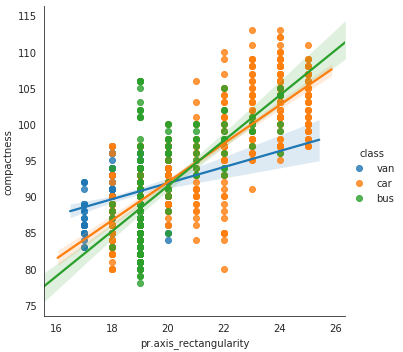

In [178]:
# Let us analyze the compactness column vs other column group wise
# compactness vs pr.axis_rectangularity
var ='pr.axis_rectangularity'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')
# Pr.axis rectangularity is correlated strongly positively for bus & car; Less correlation with van

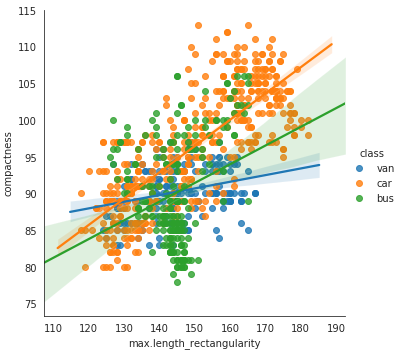

In [179]:
# Let us analyze the compactness column vs other column group wise
# compactness vs max.length_rectangularity
var ='max.length_rectangularity'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')
# Max.length rectangularity is correlated strongly positively for car & bus; Less correlation for van

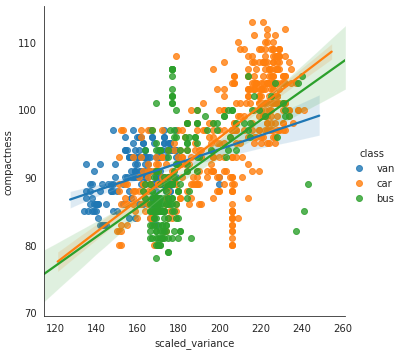

In [180]:
# Let us analyze the compactness column vs other column group wise
# compactness vs scaled_variance
var ='scaled_variance'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')

# Scaled variance is correlated strongly positively for car , bus & van
# Hence, one of the variable is redundant and can be dropped

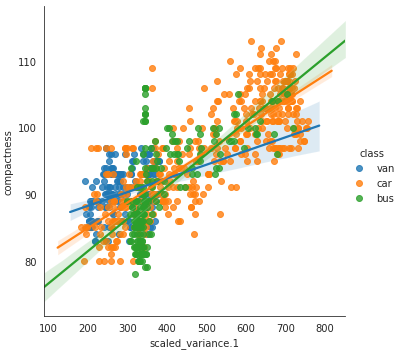

In [181]:
# Let us analyze the compactness column vs other column group wise
# compactness vs scaled_variance.1
var ='scaled_variance.1'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')
# Scaled Variance 1 is correlated strongly positively for bus, car & van
# Hence, one of the variable is redundant and can be dropped

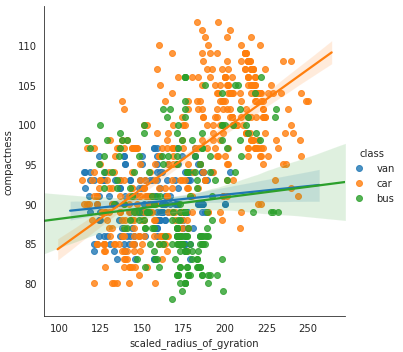

In [182]:
# Let us analyze the compactness column vs other column group wise
# compactness vs scaled_radius_of_gyration
var ='scaled_radius_of_gyration'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')
# Scaled radius of gyration is correlated strongly positively for car; Less or no correlation for bus & van

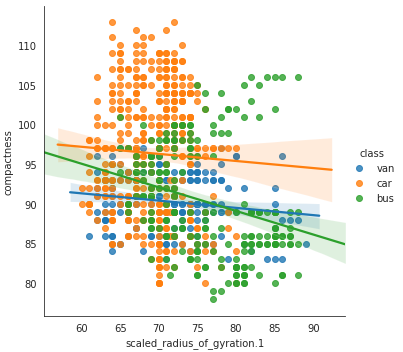

In [183]:
# Let us analyze the compactness column vs other column group wise
# compactness vs scaled_radius_of_gyration.1
var ='scaled_radius_of_gyration.1'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')
# There seems to be no or very less correlation with scaled radius of gyration1 for car, bus & van; 

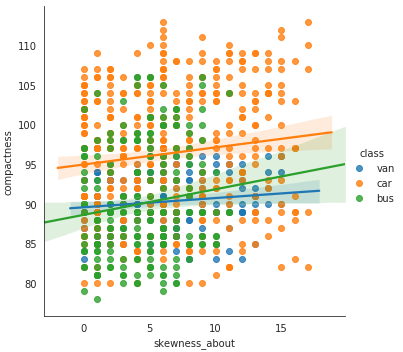

In [184]:
# Let us analyze the compactness column vs other column group wise
# compactness vs skewness_about
var ='skewness_about'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')

# There seems to be no or very less correlation with Skewness about for car, bus & van; 

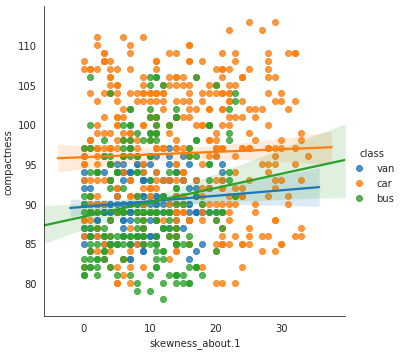

In [185]:
# Let us analyze the compactness column vs other column group wise
# compactness vs skewness_about.1
var ='skewness_about.1'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')
# There seems to be no or very less correlation with Skewness about1 for car, bus & van; 

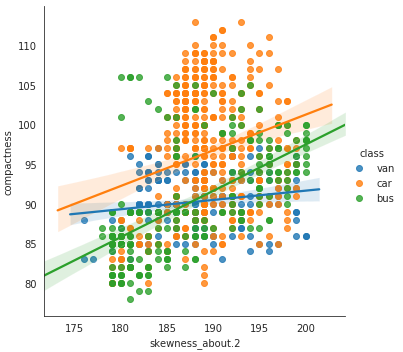

In [186]:
# Let us analyze the compactness column vs other column group wise
# compactness vs skewness_about.2
var ='skewness_about.2'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')
# There is positive correlation of skewness about 2 for both car & bus but nil correlation for van

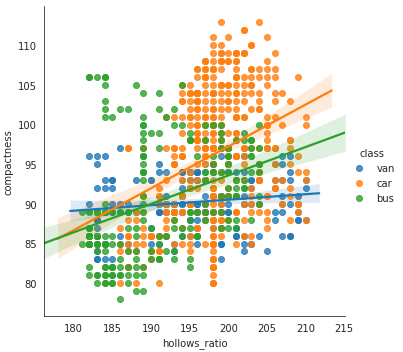

In [187]:
# Let us analyze the compactness column vs other column group wise
# compactness vs hollows_ratio
var ='hollows_ratio'

with sns.axes_style('white'):
    plot = sns.lmplot(var, 'compactness', data = concat_data, hue ='class')
    
# There is positive correlation of hollows ratio for both car & bus but nil correlation for van

In [188]:
# However, we have not been able to conclusively select variables needed for model preparation
# Hence, we will use Decision Tree Classifier to understand importance of independent variables
X = concat_data.drop('class',axis=1)
y = concat_data['class']
dTree = DecisionTreeClassifier(random_state =1, max_depth =7)
dTree.fit(X,y)
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X.columns))

                                  Imp
compactness                  0.011146
circularity                  0.000000
distance_circularity         0.016326
radius_ratio                 0.002648
pr.axis_aspect_ratio         0.094161
max.length_aspect_ratio      0.214239
scatter_ratio                0.000000
elongatedness                0.016293
pr.axis_rectangularity       0.000000
max.length_rectangularity    0.092210
scaled_variance              0.270543
scaled_variance.1            0.208073
scaled_radius_of_gyration    0.008143
scaled_radius_of_gyration.1  0.028309
skewness_about               0.027220
skewness_about.1             0.003757
skewness_about.2             0.006933
hollows_ratio                0.000000


In [189]:
# Based on the above importances, we could drop some variables with nil or less than 1% importances; Also add class to the list
dummy_variables = ['circularity','scatter_ratio','pr.axis_rectangularity','hollows_ratio', 'radius_ratio',
                  'scaled_radius_of_gyration','skewness_about.1','skewness_about.2', 'class']
X = concat_data.drop(dummy_variables, axis =1)
y = concat_data['class']

In [190]:
# 3. Standardization of data and train-test split
X_scaled = X.apply(zscore)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.3, random_state =1)

In [191]:
# 4. Train a support vector machine model
clf = svm.SVC()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
# Observes the drop in scores from training to test set

0.9712837837837838
0.9566929133858267


In [192]:
# 5. K-fold cross validation
kfold = KFold(n_splits = 50, random_state = 1)
model = svm.SVC()
results = cross_val_score(model, X_scaled, y, cv = kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\Users\amikar.jha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[1.         0.88235294 0.94117647 0.88235294 0.94117647 1.
 1.         1.         1.         1.         1.         1.
 0.94117647 0.88235294 1.         1.         0.94117647 0.94117647
 1.         1.         0.94117647 1.         0.94117647 0.94117647
 1.         1.         0.94117647 1.         0.94117647 1.
 0.88235294 0.94117647 0.82352941 1.         0.94117647 0.94117647
 0.94117647 0.94117647 0.88235294 0.94117647 1.         1.
 1.         0.94117647 1.         1.         1.         1.
 1.         1.        ]
Accuracy: 96.471% (4.402%)


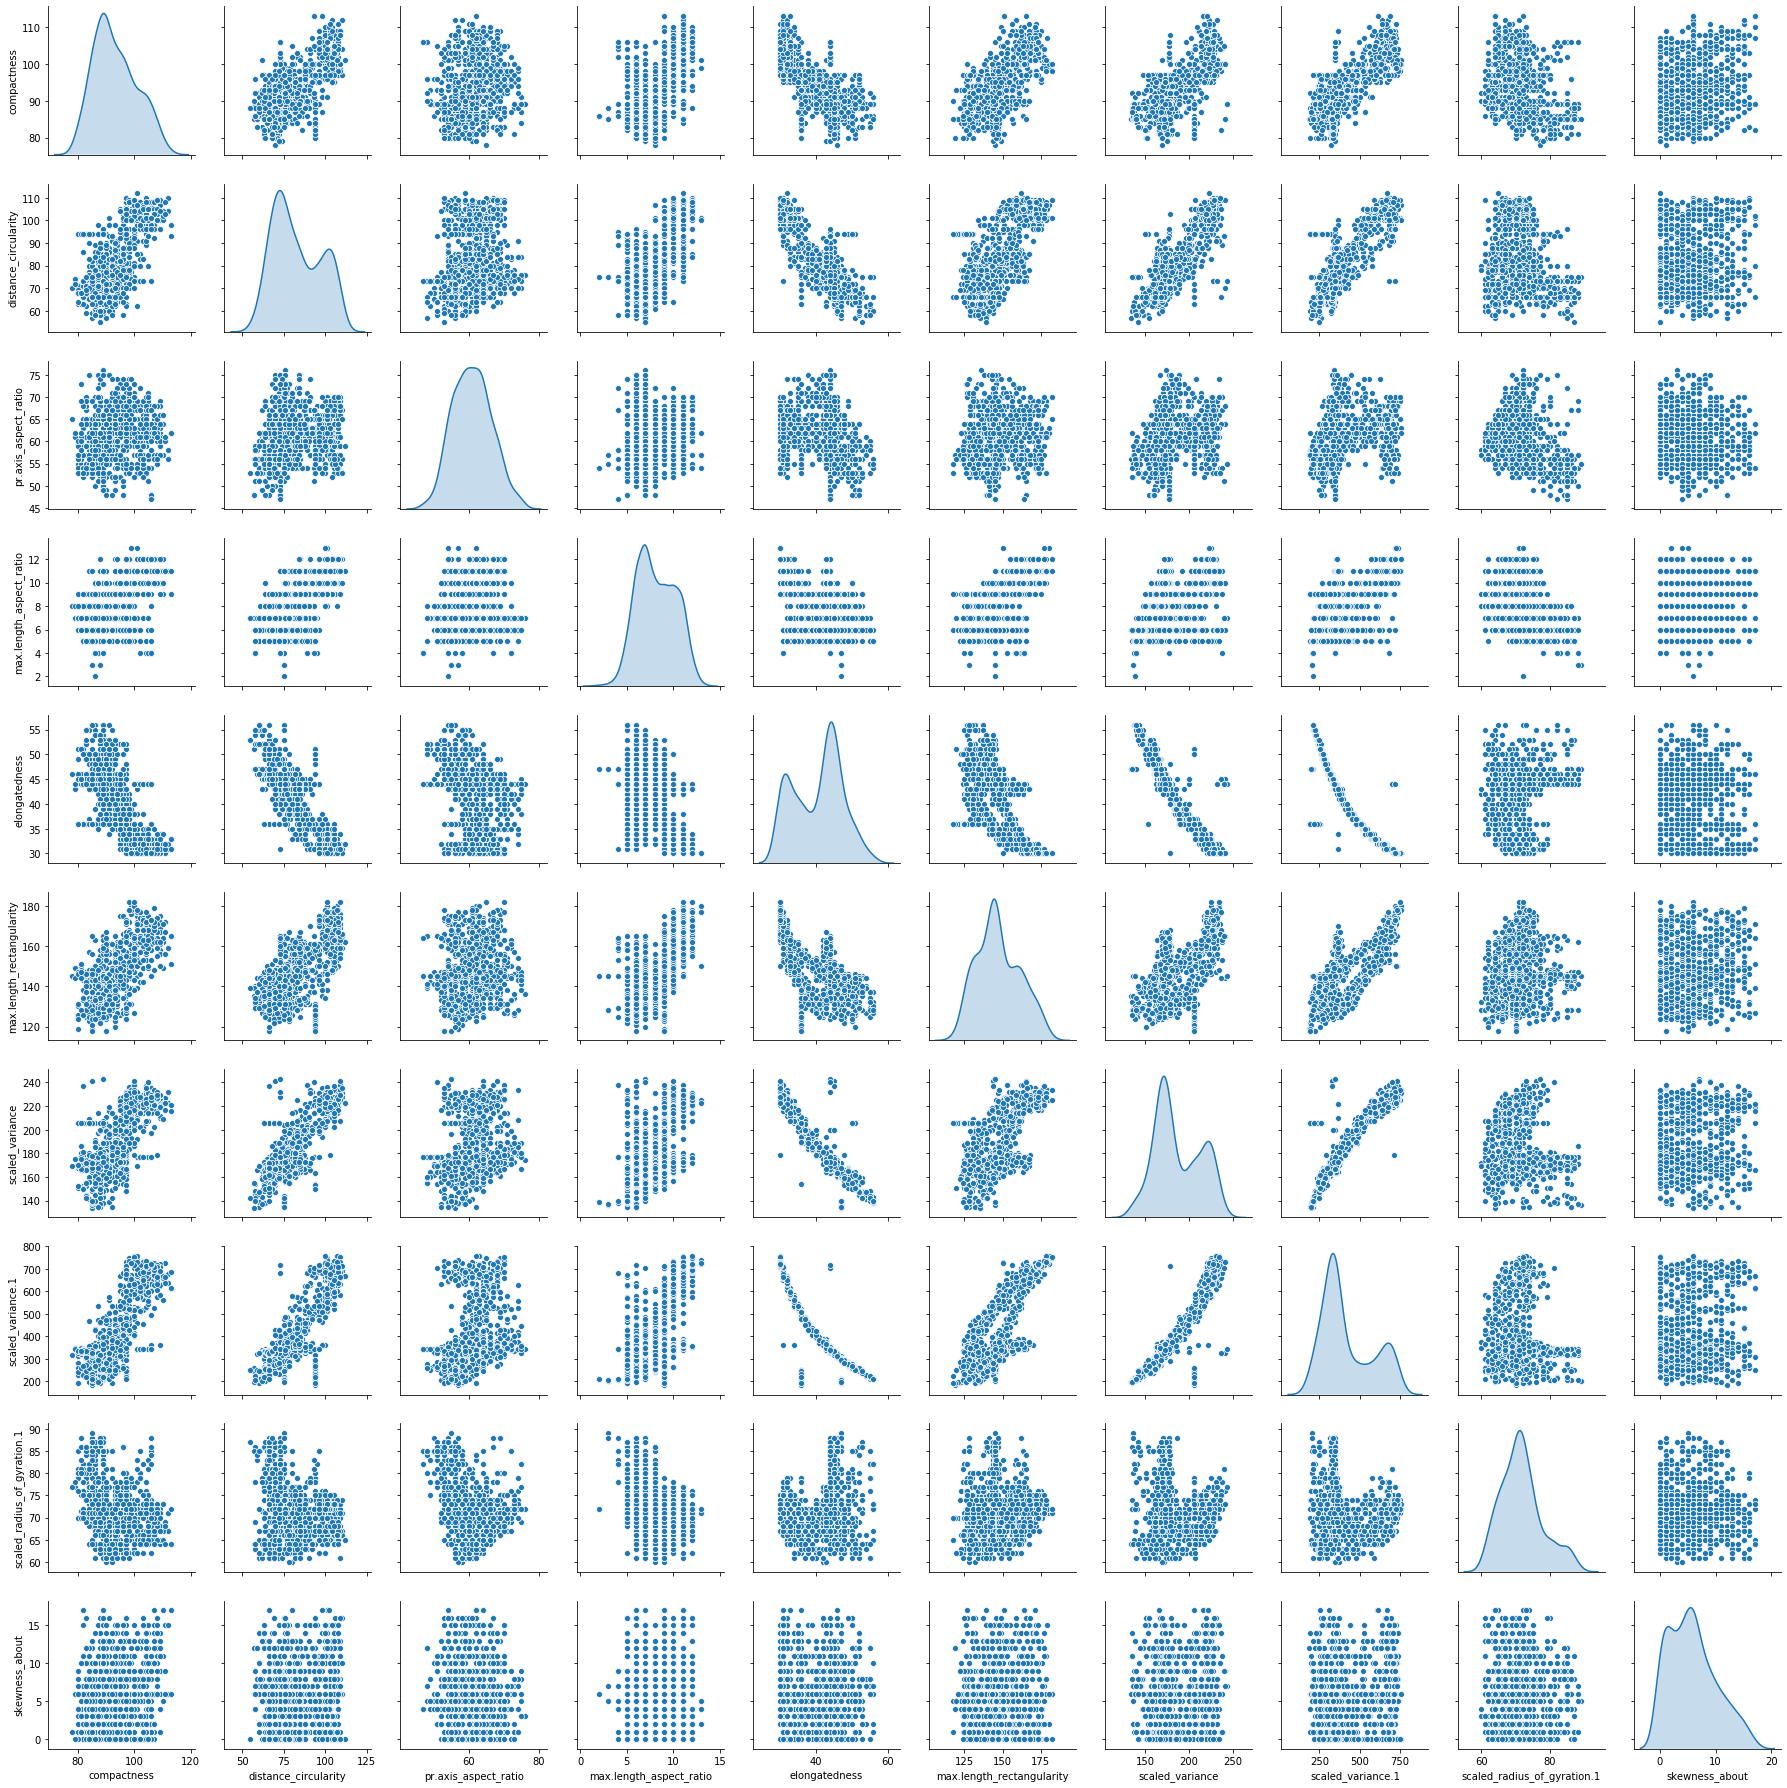

In [193]:
# 6. PCA works best when there is high corelation b/w independent attributes
# We can see strong correlation b/w quite a few attributes. However, there are less correlation as well among few
# With PCA, we want to feed the correlation between independent attributes to our model to make it more general & prevent from
# overfitting
# PCA is done only for independent attributes
sns.pairplot(X, diag_kind = 'kde')

In [194]:
# 6 a) Create a covariance matrix for the standardized data
# Co-variance matrix is number representation of pair plot shown above
covMatrix = np.cov(X_scaled.T)
print(covMatrix)

[[ 1.00118343  0.69458119  0.21216575  0.51776589 -0.71145046  0.63194936
   0.68630498  0.77575778 -0.27224146  0.175134  ]
 [ 0.69458119  1.00118343  0.2041345   0.67329945 -0.83446684  0.62678177
   0.81005921  0.83133017 -0.25630956  0.11568002]
 [ 0.21216575  0.2041345   1.00118343  0.0977983  -0.30431681  0.15541462
   0.25551996  0.28036798 -0.30494625 -0.05722167]
 [ 0.51776589  0.67329945  0.0977983   1.00118343 -0.55419544  0.64770289
   0.52886047  0.62272594 -0.29957936  0.08036082]
 [-0.71145046 -0.83446684 -0.30431681 -0.55419544  1.00118343 -0.64397857
  -0.93482293 -0.90037748  0.17514531 -0.06605511]
 [ 0.63194936  0.62678177  0.15541462  0.64770289 -0.64397857  1.00118343
   0.62797216  0.77686316  0.06749951  0.12240931]
 [ 0.68630498  0.81005921  0.25551996  0.52886047 -0.93482293  0.62797216
   1.00118343  0.88911145 -0.1259691   0.05105534]
 [ 0.77575778  0.83133017  0.28036798  0.62272594 -0.90037748  0.77686316
   0.88911145  1.00118343 -0.13836289  0.07913215]


In [195]:
# 6 b) Fit PCA model
pca = PCA(n_components = 10)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [196]:
# 6 c) Get Eigen values & Eigen vectors
print(pca.explained_variance_)
print(pca.components_)

[5.4435928  1.24767815 1.04373517 0.80446868 0.58205772 0.39052632
 0.20109472 0.16050762 0.07545305 0.0627201 ]
[[ 0.35589739  0.3871511   0.1357337   0.31417989 -0.39719592  0.33968028
   0.38803515  0.40918603 -0.10953266  0.05629609]
 [-0.01641166  0.00277417 -0.60128865  0.00411112 -0.00890234  0.28713205
   0.05720852  0.0767597   0.72043883  0.16564113]
 [ 0.12757652  0.02981393 -0.20806696  0.13612867  0.11914359 -0.04316985
  -0.14464677 -0.0952743  -0.33235499  0.87435344]
 [ 0.01767986 -0.11932451  0.61252545 -0.49971788 -0.11932271  0.02672079
   0.11499892  0.07764952  0.38928186  0.41808757]
 [ 0.15260397  0.16258414 -0.40120677 -0.53172715 -0.28754914 -0.53232231
   0.33816287  0.06007333 -0.14864788 -0.02161301]
 [ 0.78315982 -0.29310663 -0.0791881  -0.29452689  0.20772808  0.26750042
  -0.23361924  0.04586053 -0.09826208 -0.1633657 ]
 [ 0.41167343  0.46630887  0.17897376  0.26789026  0.15957039 -0.49495615
  -0.2138086  -0.18585653  0.39738593 -0.02583764]
 [-0.1923541

In [197]:
# 6 d) Display variance explained by each vector & cumulative variance
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.54371583 0.12462034 0.10425014 0.08035178 0.05813697 0.03900647
 0.0200857  0.01603179 0.00753639 0.0062646 ]
[0.54371583 0.66833616 0.77258631 0.85293809 0.91107506 0.95008153
 0.97016723 0.98619902 0.9937354  1.        ]


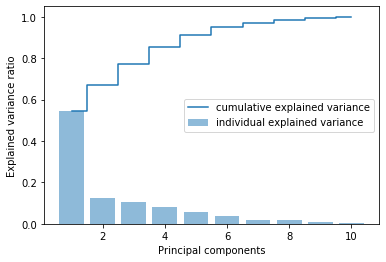

In [198]:
# 6 e) Plot the above results
plt.bar(range(1,11), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,11),np.cumsum(pca.explained_variance_ratio_), where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [199]:
# 6 e) From the above, we can conclude that we can explain 95% of data with 6 variables
# 6 f) Dimensionality reduction from 10 to 6
pca6 = PCA(n_components = 6)
pca6.fit(X_scaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(X_scaled)

[[ 0.35589739  0.3871511   0.1357337   0.31417989 -0.39719592  0.33968028
   0.38803515  0.40918603 -0.10953266  0.05629609]
 [-0.01641166  0.00277417 -0.60128865  0.00411112 -0.00890234  0.28713205
   0.05720852  0.0767597   0.72043883  0.16564113]
 [ 0.12757652  0.02981393 -0.20806696  0.13612867  0.11914359 -0.04316985
  -0.14464677 -0.0952743  -0.33235499  0.87435344]
 [ 0.01767986 -0.11932451  0.61252545 -0.49971788 -0.11932271  0.02672079
   0.11499892  0.07764952  0.38928186  0.41808757]
 [ 0.15260397  0.16258414 -0.40120677 -0.53172715 -0.28754914 -0.53232231
   0.33816287  0.06007333 -0.14864788 -0.02161301]
 [ 0.78315982 -0.29310663 -0.0791881  -0.29452689  0.20772808  0.26750042
  -0.23361924  0.04586053 -0.09826208 -0.1633657 ]]
[0.54371583 0.12462034 0.10425014 0.08035178 0.05813697 0.03900647]


0             1             2             3             4  \
0  1.000000e+00 -6.858955e-17  8.797280e-17 -3.842444e-17 -5.934494e-17   
1 -6.858955e-17  1.000000e+00  2.519923e-16  8.719319e-17  8.126014e-16   
2  8.797280e-17  2.519923e-16  1.000000e+00 -1.125572e-16  3.251257e-16   
3 -3.842444e-17  8.719319e-17 -1.125572e-16  1.000000e+00  6.961676e-16   
4 -5.934494e-17  8.126014e-16  3.251257e-16  6.961676e-16  1.000000e+00   
5 -3.438697e-16  4.529154e-16 -1.497153e-16  2.498797e-16  3.986243e-16   

              5  
0 -3.438697e-16  
1  4.529154e-16  
2 -1.497153e-16  
3  2.498797e-16  
4  3.986243e-16  
5  1.000000e+00

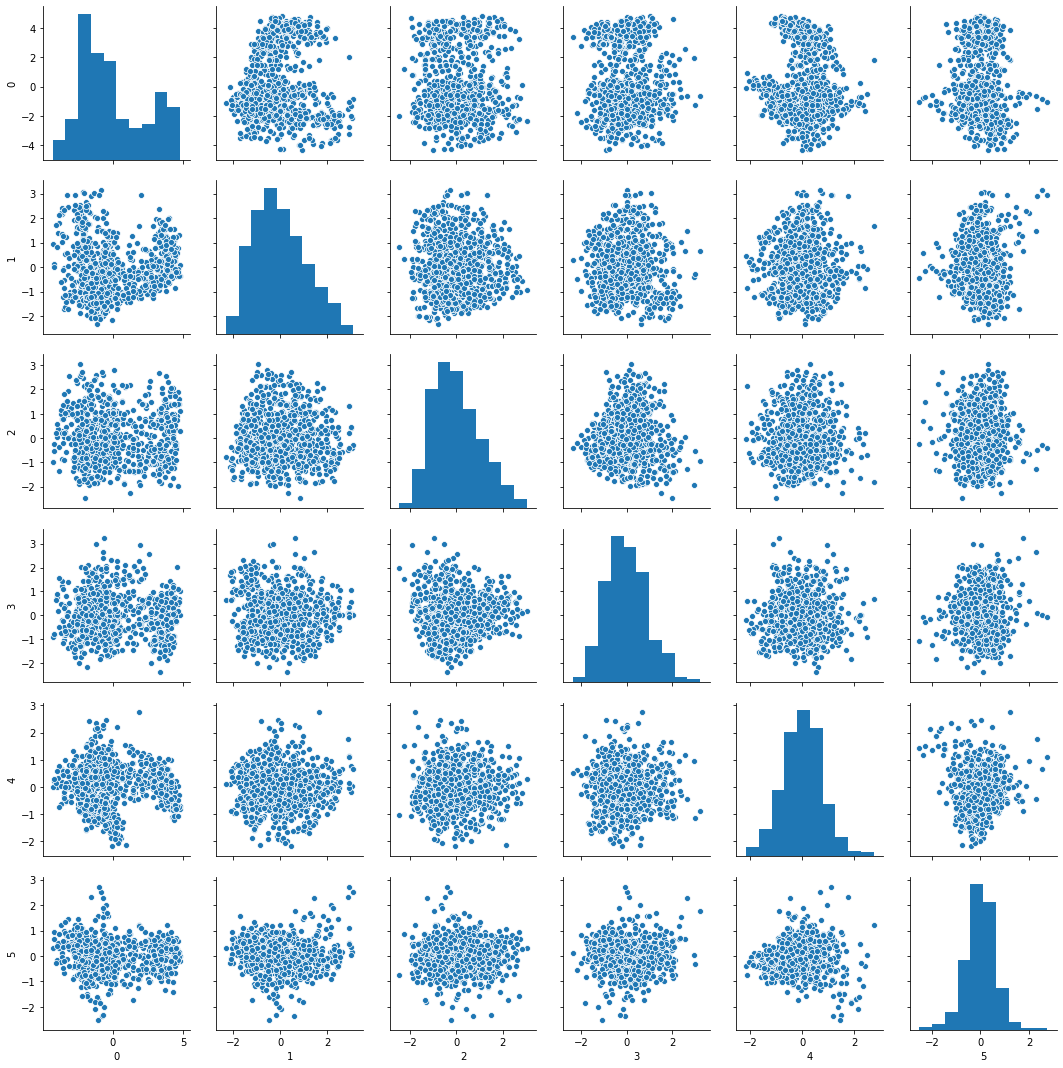

In [200]:
# 6 g) Check correlation between chosen principal components
sns.pairplot(pd.DataFrame(Xpca6))
pd.DataFrame(Xpca6).corr()
# Very low or nil correlation b/w principal components chosen above

In [201]:
# 7 a) Training & Test split for the principal components extracted above
X_train_pca, X_test_pca, y_train, y_test = train_test_split(Xpca6, y, test_size = 0.3, random_state =1)

In [202]:
# 7 b) Support Vector Machine on principal components extracted above
clf_pca = svm.SVC()
clf_pca.fit(X_train_pca, y_train)
print(clf_pca.score(X_train_pca, y_train))
print(clf_pca.score(X_test_pca, y_test))

0.9662162162162162
0.9448818897637795


In [203]:
# 7 c) K-fold cross validation on the support vector machine on principal components
kfold_pca = KFold(n_splits = 50, random_state = 1)
model_pca = svm.SVC()
results = cross_val_score(model_pca, Xpca6, y, cv = kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\Users\amikar.jha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.94117647 0.94117647 0.94117647 0.88235294 0.94117647 1.
 1.         1.         1.         1.         1.         1.
 0.94117647 0.88235294 1.         1.         0.94117647 0.94117647
 1.         0.94117647 1.         0.94117647 0.94117647 0.94117647
 0.94117647 1.         0.94117647 1.         0.94117647 1.
 0.82352941 0.94117647 0.82352941 0.94117647 0.94117647 0.94117647
 0.94117647 0.94117647 0.88235294 0.94117647 1.         1.
 1.         0.94117647 0.94117647 1.         0.9375     1.
 1.         1.        ]
Accuracy: 95.757% (4.411%)


In [204]:
# 8) Accuracy scores comparison
# When we compare scores of SVM for training from w/o pca and w/pca, both scores are 0.97 and there is hardly any drop
# When we compare test score of SVM from w/o pca and w/pca, scores are 0.956 & 0.944 respectively
# Drop in score is quite expected with dropping of variables and also the fact that dimensions were not strongly correlated 
# for a few case 
# But only a ~1% drop is justifiable because of multiple advantages
# that comes with dimensionality reduction. We will have faster computation time and reduction in risk of overfitting
# More importantly, the base assumption of any supervised learning method of independent attributes is justified with principal
# components. 
# However, average scores of k-fold cross validation from w/o pca and w/pca are very close. Both comes to 0.96 approximately
# Their std. deviation is almost same. Hence, going with principal components is beneficial